In [81]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import StandardScaler

# Directory containing the cleaned CSV files
RAW_DATA_DIR = Path.cwd().parent.parent / "data" / "raw"
POPULATION_DIR = RAW_DATA_DIR / "population_data"
CLEANED_DIR = Path.cwd().parent.parent / "data" / "processed" / "cleaned_data"
PROJECTED_DATA = Path.cwd().parent.parent / "data" / "processed" / "projected_data"
CRIME_DATA = CLEANED_DIR / "cleaned_crime_data.csv"
ECONOMIC_DATA = CLEANED_DIR / "cleaned_economic_data.csv"
EDUCATION_DATA = CLEANED_DIR / "cleaned_education_data.csv"
HOUSING_DATA = CLEANED_DIR / "cleaned_housing_data.csv"
JOB_OPENINGS_DATA = CLEANED_DIR / "cleaned_job_openings_data.csv"
PUBLIC_SCHOOL_DATA = CLEANED_DIR / "cleaned_public_school_data.csv"
POP_PROJECT = PROJECTED_DATA / "county_population_projections.csv"
POP_2023 = POPULATION_DIR / "census_population_data_2023.csv"
PUBLIC_SCHOOL_DATA = CLEANED_DIR / "cleaned_public_school_data.csv"


In [82]:
# crime_df = pd.read_csv(CRIME_DATA)
county_with_geo = pd.read_csv(POP_PROJECT)
economic_df = pd.read_csv(ECONOMIC_DATA)
education_df = pd.read_csv(EDUCATION_DATA)
housing_df = pd.read_csv(HOUSING_DATA)
job_openings_df = pd.read_csv(JOB_OPENINGS_DATA)
public_school_df = pd.read_csv(PUBLIC_SCHOOL_DATA)

# Merge all dataframes on COUNTY_FIPS
merged_df = economic_df.merge(
    education_df, on=['COUNTY_FIPS','STATE','COUNTY','NAME','POPULATION', 'YEAR'], how='inner'
).merge(
    housing_df, on=['COUNTY_FIPS','STATE','COUNTY','NAME','POPULATION', 'YEAR'], how='inner'
).merge(
    job_openings_df, on=['COUNTY_FIPS','STATE','COUNTY','NAME','POPULATION', 'YEAR'], how='inner'
).merge(
    public_school_df, on=['COUNTY_FIPS','STATE','COUNTY','NAME','POPULATION', 'YEAR'], how='inner'
)

# Drop columns containing 'z_score'
merged_df = merged_df.loc[:, ~merged_df.columns.str.contains('z_score', case=False)]

In [83]:
merged_df.columns


Index(['MEDIAN_INCOME', 'TOTAL_EMPLOYED_POPULATION', 'UNEMPLOYED_PERSONS',
       'TOTAL_LABOR_FORCE', 'COUNTY_FIPS', 'YEAR', 'UNEMPLOYMENT_RATE',
       'POPULATION', 'STATE', 'COUNTY', 'NAME', 'TOTAL_POPULATION_25_64',
       'LESS_THAN_HIGH_SCHOOL_TOTAL', 'HIGH_SCHOOL_GRADUATE_TOTAL',
       'SOME_COLLEGE_TOTAL', 'BACHELORS_OR_HIGHER_TOTAL',
       'TOTAL_ENROLLED_AND_NOT_ENROLLED', 'TOTAL_ENROLLED',
       'ENROLLED_NURSERY_PRESCHOOL', 'ENROLLED_KINDERGARTEN',
       'ENROLLED_GRADE1_4', 'ENROLLED_GRADE5_8', 'ENROLLED_GRADE9_12',
       'ENROLLED_COLLEGE_UNDERGRAD', 'ENROLLED_GRADUATE_PROFESSIONAL',
       'LESS_THAN_HIGH_SCHOOL_UNEMPLOYED', 'HIGH_SCHOOL_GRADUATE_UNEMPLOYED',
       'SOME_COLLEGE_UNEMPLOYED', 'BACHELORS_OR_HIGHER_UNEMPLOYED', 'MALE_5-9',
       'MALE_10-14', 'MALE_15-17', 'FEMALE_5-9', 'FEMALE_10-14',
       'FEMALE_15-17', 'ELEMENTARY_SCHOOL_POPULATION',
       'MIDDLE_SCHOOL_POPULATION', 'HIGH_SCHOOL_POULATION',
       'TOTAL_HOUSING_UNITS', 'OCCUPIED_HOUSING_UNI

In [84]:
erie_df = merged_df.loc[merged_df["COUNTY_FIPS"] == 36029].copy()


erie_df.loc[erie_df["YEAR"] != 2023, ["PUBLIC_SCHOOL_STUDENTS", "PUBLIC_SCHOOL_TEACHERS", "STUDENT_TEACHER_RATIO", "ELEMENTARY_SCHOOL_POPULATION", "MIDDLE_SCHOOL_POPULATION", "HIGH_SCHOOL_POULATION"]] = 0
erie_df

,MEDIAN_INCOME,TOTAL_EMPLOYED_POPULATION,UNEMPLOYED_PERSONS,TOTAL_LABOR_FORCE,COUNTY_FIPS,YEAR,UNEMPLOYMENT_RATE,POPULATION,STATE,COUNTY,...,JOB_OPENING_JUN,JOB_OPENING_JUL,JOB_OPENING_AUG,JOB_OPENING_SEP,JOB_OPENING_OCT,JOB_OPENING_NOV,JOB_OPENING_DEC,PUBLIC_SCHOOL_STUDENTS,PUBLIC_SCHOOL_TEACHERS,STUDENT_TEACHER_RATIO
1609,41560.0,464994.0,23643.0,488637.0,36029,2023,4.84,950044,36,29,...,21657.0,20366.0,22422.0,22469.0,22039.0,22183.0,22852.0,122106.0,11435.0,10.678268


In [85]:
erie_df.columns

Index(['MEDIAN_INCOME', 'TOTAL_EMPLOYED_POPULATION', 'UNEMPLOYED_PERSONS',
       'TOTAL_LABOR_FORCE', 'COUNTY_FIPS', 'YEAR', 'UNEMPLOYMENT_RATE',
       'POPULATION', 'STATE', 'COUNTY', 'NAME', 'TOTAL_POPULATION_25_64',
       'LESS_THAN_HIGH_SCHOOL_TOTAL', 'HIGH_SCHOOL_GRADUATE_TOTAL',
       'SOME_COLLEGE_TOTAL', 'BACHELORS_OR_HIGHER_TOTAL',
       'TOTAL_ENROLLED_AND_NOT_ENROLLED', 'TOTAL_ENROLLED',
       'ENROLLED_NURSERY_PRESCHOOL', 'ENROLLED_KINDERGARTEN',
       'ENROLLED_GRADE1_4', 'ENROLLED_GRADE5_8', 'ENROLLED_GRADE9_12',
       'ENROLLED_COLLEGE_UNDERGRAD', 'ENROLLED_GRADUATE_PROFESSIONAL',
       'LESS_THAN_HIGH_SCHOOL_UNEMPLOYED', 'HIGH_SCHOOL_GRADUATE_UNEMPLOYED',
       'SOME_COLLEGE_UNEMPLOYED', 'BACHELORS_OR_HIGHER_UNEMPLOYED', 'MALE_5-9',
       'MALE_10-14', 'MALE_15-17', 'FEMALE_5-9', 'FEMALE_10-14',
       'FEMALE_15-17', 'ELEMENTARY_SCHOOL_POPULATION',
       'MIDDLE_SCHOOL_POPULATION', 'HIGH_SCHOOL_POULATION',
       'TOTAL_HOUSING_UNITS', 'OCCUPIED_HOUSING_UNI

In [86]:
filter_columns = ['PUBLIC_SCHOOL_STUDENTS',
       'STUDENT_TEACHER_RATIO', 'ELEMENTARY_SCHOOL_POPULATION', 'MIDDLE_SCHOOL_POPULATION',
       'HIGH_SCHOOL_POULATION', 'COUNTY_FIPS', 'STATE', 'COUNTY', 'NAME', 'TOTAL_EMPLOYED_POPULATION', 'TOTAL_LABOR_FORCE', 'JOB_OPENING_JAN',
       'JOB_OPENING_FEB', 'JOB_OPENING_MAR', 'JOB_OPENING_APR',
       'JOB_OPENING_MAY', 'JOB_OPENING_JUN', 'JOB_OPENING_JUL',
       'JOB_OPENING_AUG', 'JOB_OPENING_SEP', 'JOB_OPENING_OCT',
       'JOB_OPENING_NOV', 'JOB_OPENING_DEC', 'POPULATION', 'YEAR', 'OCCUPIED_HOUSING_UNITS']

erie_df = erie_df[filter_columns]
erie_df = erie_df[erie_df["YEAR"] == 2023]
erie_df.columns

Index(['PUBLIC_SCHOOL_STUDENTS', 'STUDENT_TEACHER_RATIO',
       'ELEMENTARY_SCHOOL_POPULATION', 'MIDDLE_SCHOOL_POPULATION',
       'HIGH_SCHOOL_POULATION', 'COUNTY_FIPS', 'STATE', 'COUNTY', 'NAME',
       'TOTAL_EMPLOYED_POPULATION', 'TOTAL_LABOR_FORCE', 'JOB_OPENING_JAN',
       'JOB_OPENING_FEB', 'JOB_OPENING_MAR', 'JOB_OPENING_APR',
       'JOB_OPENING_MAY', 'JOB_OPENING_JUN', 'JOB_OPENING_JUL',
       'JOB_OPENING_AUG', 'JOB_OPENING_SEP', 'JOB_OPENING_OCT',
       'JOB_OPENING_NOV', 'JOB_OPENING_DEC', 'POPULATION', 'YEAR',
       'OCCUPIED_HOUSING_UNITS'],
      dtype='object')

In [87]:
pop_projcet_df = pd.read_csv(POP_PROJECT)
pop_2023 = pd.read_csv(POP_2023)

pop_2023["STATE"] = pop_2023["STATE"].astype(str).str.zfill(2)
pop_2023["COUNTY"] = pop_2023["COUNTY"].astype(str).str.zfill(3)

# Concatenate STATE and COUNTY to create COUNTY_FIPS
pop_2023["COUNTY_FIPS"] = pop_2023["STATE"] + pop_2023["COUNTY"]

pop_projcet_df["COUNTY_FIPS"] = pop_projcet_df["COUNTY_FIPS"].astype(str).str.zfill(5)
pop_2023["COUNTY_FIPS"] = pop_2023["COUNTY_FIPS"].astype(str).str.zfill(5)

pop_projcet_df_erie = pop_projcet_df[pop_projcet_df["COUNTY_FIPS"] == "36029"].copy()
pop_2023_erie = pop_2023[pop_2023["COUNTY_FIPS"] == "36029"].copy()


pop_projcet_combined = pop_projcet_df_erie.merge(
    pop_2023_erie, 
    on=['COUNTY_FIPS'], 
    how='left'
)
pop_projcet_combined.rename(columns={"B01003_001E": "Pop_2023"}, inplace=True)
pop_projcet_combined = pop_projcet_combined[["COUNTY_FIPS", "STATE", "COUNTY", "NAME", "Pop_2023", "POPULATION_2065_S3", "POPULATION_2065_S5b", "POPULATION_2065_S5a", "POPULATION_2065_S5c", "CLIMATE_REGION", "POPULATION_2010"]]

pop_projcet_combined


,COUNTY_FIPS,STATE,COUNTY,NAME,Pop_2023,POPULATION_2065_S3,POPULATION_2065_S5b,POPULATION_2065_S5a,POPULATION_2065_S5c,CLIMATE_REGION,POPULATION_2010
0,36029,36,029,"Erie County, New York",950044,924640,1008810,966725,1092979,Northeast,921202


In [88]:
pop_projcet_combined["S3_Percentage_Change"] = ((pop_projcet_combined["POPULATION_2065_S3"] - pop_projcet_combined["Pop_2023"]) / pop_projcet_combined["Pop_2023"]) * 100
pop_projcet_combined["S5b_Percentage_Change"] = ((pop_projcet_combined["POPULATION_2065_S5b"] - pop_projcet_combined["Pop_2023"]) / pop_projcet_combined["Pop_2023"]) * 100
pop_projcet_combined["S5a_Percentage_Change"] = ((pop_projcet_combined["POPULATION_2065_S5a"] - pop_projcet_combined["Pop_2023"]) / pop_projcet_combined["Pop_2023"]) * 100
pop_projcet_combined["S5c_Percentage_Change"] = ((pop_projcet_combined["POPULATION_2065_S5c"] - pop_projcet_combined["Pop_2023"]) / pop_projcet_combined["Pop_2023"]) * 100

# Display results
pop_projcet_combined[["COUNTY_FIPS", "S3_Percentage_Change", "S5b_Percentage_Change", "S5a_Percentage_Change", "S5c_Percentage_Change"]]

,COUNTY_FIPS,S3_Percentage_Change,S5b_Percentage_Change,S5a_Percentage_Change,S5c_Percentage_Change
0,36029,-2.673981,6.185608,1.755813,15.045093


In [89]:
print(erie_df.dtypes)

PUBLIC_SCHOOL_STUDENTS          float64
STUDENT_TEACHER_RATIO           float64
ELEMENTARY_SCHOOL_POPULATION      int64
MIDDLE_SCHOOL_POPULATION          int64
HIGH_SCHOOL_POULATION             int64
COUNTY_FIPS                       int64
STATE                             int64
COUNTY                            int64
NAME                             object
TOTAL_EMPLOYED_POPULATION       float64
TOTAL_LABOR_FORCE               float64
JOB_OPENING_JAN                 float64
JOB_OPENING_FEB                 float64
JOB_OPENING_MAR                 float64
JOB_OPENING_APR                 float64
JOB_OPENING_MAY                 float64
JOB_OPENING_JUN                 float64
JOB_OPENING_JUL                 float64
JOB_OPENING_AUG                 float64
JOB_OPENING_SEP                 float64
JOB_OPENING_OCT                 float64
JOB_OPENING_NOV                 float64
JOB_OPENING_DEC                 float64
POPULATION                        int64
YEAR                              int64


In [90]:
percentage_changes = pop_projcet_combined[
    ["S3_Percentage_Change", "S5b_Percentage_Change", "S5a_Percentage_Change", "S5c_Percentage_Change"]
].iloc[0].to_dict()

original_df = erie_df[erie_df["YEAR"] == 2023].copy()
original_df["Scenario"] = "Original"

# Define a function to calculate projected values for each scenario
def calculate_projected_values(df, base_year, percentage_change, scenario_name):
    projected_df = df[df["YEAR"] == base_year].copy()
    projected_df["Scenario"] = scenario_name
    
    # Exclude columns that should not be scaled
    columns_to_exclude = ["COUNTY_FIPS", "STATE", "COUNTY", "YEAR", "NAME", "Scenario"]
    numeric_cols = [col for col in df.columns if col not in columns_to_exclude]
    
    # Scale the numeric columns for the projected values
    for col in numeric_cols:
        projected_df[col] = round(projected_df[col] * (1 + percentage_change / 100))
    
    return projected_df

# Calculate projected values for each scenario
erie_s3_2065 = calculate_projected_values(erie_df, base_year=2023, percentage_change=percentage_changes["S3_Percentage_Change"], scenario_name="S3")
erie_s5b_2065 = calculate_projected_values(erie_df, base_year=2023, percentage_change=percentage_changes["S5b_Percentage_Change"], scenario_name="S5b")
erie_s5a_2065 = calculate_projected_values(erie_df, base_year=2023, percentage_change=percentage_changes["S5a_Percentage_Change"], scenario_name="S5a")
erie_s5c_2065 = calculate_projected_values(erie_df, base_year=2023, percentage_change=percentage_changes["S5c_Percentage_Change"], scenario_name="S5c")

# Combine all scenarios into a single DataFrame for comparison
erie_2065_combined = pd.concat([original_df, erie_s3_2065, erie_s5b_2065, erie_s5a_2065, erie_s5c_2065], ignore_index=True)
erie_2065_combined.drop(columns=["COUNTY_FIPS", "STATE", "COUNTY", "NAME", "YEAR", "STUDENT_TEACHER_RATIO"], inplace=True)
erie_2065_combined

,PUBLIC_SCHOOL_STUDENTS,ELEMENTARY_SCHOOL_POPULATION,MIDDLE_SCHOOL_POPULATION,HIGH_SCHOOL_POULATION,TOTAL_EMPLOYED_POPULATION,TOTAL_LABOR_FORCE,JOB_OPENING_JAN,JOB_OPENING_FEB,JOB_OPENING_MAR,JOB_OPENING_APR,...,JOB_OPENING_JUN,JOB_OPENING_JUL,JOB_OPENING_AUG,JOB_OPENING_SEP,JOB_OPENING_OCT,JOB_OPENING_NOV,JOB_OPENING_DEC,POPULATION,OCCUPIED_HOUSING_UNITS,Scenario
0,122106.0,54793.0,53504.0,33869.0,464994.0,488637.0,22183.0,20605.0,19410.0,20987.0,...,21657.0,20366.0,22422.0,22469.0,22039.0,22183.0,22852.0,950044.0,408711.0,Original
1,118841.0,53328.0,52073.0,32963.0,452560.0,475571.0,21590.0,20054.0,18891.0,20426.0,...,21078.0,19821.0,21822.0,21868.0,21450.0,21590.0,22241.0,924640.0,397782.0,S3
2,129659.0,58182.0,56814.0,35964.0,493757.0,518862.0,23555.0,21880.0,20611.0,22285.0,...,22997.0,21626.0,23809.0,23859.0,23402.0,23555.0,24266.0,1008810.0,433992.0,S5b
3,124250.0,55755.0,54443.0,34464.0,473158.0,497217.0,22572.0,20967.0,19751.0,21355.0,...,22037.0,20724.0,22816.0,22864.0,22426.0,22572.0,23253.0,966725.0,415887.0,S5a
4,140477.0,63037.0,61554.0,38965.0,534953.0,562153.0,25520.0,23705.0,22330.0,24145.0,...,24915.0,23430.0,25795.0,25849.0,25355.0,25520.0,26290.0,1092979.0,470202.0,S5c


In [91]:
erie_2065_combined["STUDENT_TEACHER_RATIO"] = erie_2065_combined["PUBLIC_SCHOOL_STUDENTS"] / 11435
erie_2065_combined["AVAILABLE_HOUSING_UNITS"] = 439987 - erie_2065_combined["OCCUPIED_HOUSING_UNITS"]
erie_2065_combined["TOTAL_EMPLOYED_PERCENTAGE"] = (464994 / erie_2065_combined["TOTAL_LABOR_FORCE"]) * 100
erie_2065_combined["UNEMPLOYMENT_RATE"] = 100 - erie_2065_combined["TOTAL_EMPLOYED_PERCENTAGE"]
erie_2065_combined

,PUBLIC_SCHOOL_STUDENTS,ELEMENTARY_SCHOOL_POPULATION,MIDDLE_SCHOOL_POPULATION,HIGH_SCHOOL_POULATION,TOTAL_EMPLOYED_POPULATION,TOTAL_LABOR_FORCE,JOB_OPENING_JAN,JOB_OPENING_FEB,JOB_OPENING_MAR,JOB_OPENING_APR,...,JOB_OPENING_OCT,JOB_OPENING_NOV,JOB_OPENING_DEC,POPULATION,OCCUPIED_HOUSING_UNITS,Scenario,STUDENT_TEACHER_RATIO,AVAILABLE_HOUSING_UNITS,TOTAL_EMPLOYED_PERCENTAGE,UNEMPLOYMENT_RATE
0,122106.0,54793.0,53504.0,33869.0,464994.0,488637.0,22183.0,20605.0,19410.0,20987.0,...,22039.0,22183.0,22852.0,950044.0,408711.0,Original,10.678268,31276.0,95.161439,4.838561
1,118841.0,53328.0,52073.0,32963.0,452560.0,475571.0,21590.0,20054.0,18891.0,20426.0,...,21450.0,21590.0,22241.0,924640.0,397782.0,S3,10.392742,42205.0,97.775937,2.224063
2,129659.0,58182.0,56814.0,35964.0,493757.0,518862.0,23555.0,21880.0,20611.0,22285.0,...,23402.0,23555.0,24266.0,1008810.0,433992.0,S5b,11.338784,5995.0,89.618049,10.381951
3,124250.0,55755.0,54443.0,34464.0,473158.0,497217.0,22572.0,20967.0,19751.0,21355.0,...,22426.0,22572.0,23253.0,966725.0,415887.0,S5a,10.865763,24100.0,93.519329,6.480671
4,140477.0,63037.0,61554.0,38965.0,534953.0,562153.0,25520.0,23705.0,22330.0,24145.0,...,25355.0,25520.0,26290.0,1092979.0,470202.0,S5c,12.284827,-30215.0,82.716627,17.283373


In [185]:
cols = ['UNEMPLOYMENT_RATE', 'STUDENT_TEACHER_RATIO', 'AVAILABLE_HOUSING_UNITS']

# Assuming your dataframe is named df
df_scaled = erie_2065_combined.copy()
scaler = MinMaxScaler()

z_scaler = StandardScaler()
df_scaled[[f'z_{c}' for c in cols]] = z_scaler.fit_transform(erie_2065_combined[cols])

# Normalize
df_scaled[[f'norm_{c}' for c in cols]] = scaler.fit_transform(erie_2065_combined[cols])
df_scaled[[f'z_{c}' for c in cols]]

,z_UNEMPLOYMENT_RATE,z_STUDENT_TEACHER_RATIO,z_AVAILABLE_HOUSING_UNITS
0,-0.649603,-0.655027,0.655016
1,-1.148664,-1.086158,1.086163
2,0.408531,0.342316,-0.342314
3,-0.336153,-0.371921,0.371925
4,1.725889,1.770790,-1.770790


In [186]:
# Flip unemployment and student-teacher ratio (lower is better)
df_scaled["Index_Balanced"] = (
    (-df_scaled["z_UNEMPLOYMENT_RATE"]) * 0.33 + 
    (-df_scaled["z_STUDENT_TEACHER_RATIO"]) * 0.33 + 
    df_scaled["z_AVAILABLE_HOUSING_UNITS"] * 0.33
)

df_scaled["Index_Employment"] = (
    (-df_scaled["z_UNEMPLOYMENT_RATE"]) * 0.6 + 
    (-df_scaled["z_STUDENT_TEACHER_RATIO"]) * 0.2 + 
    df_scaled["z_AVAILABLE_HOUSING_UNITS"] * 0.2
)

df_scaled["Index_Housing"] = (
    (-df_scaled["z_UNEMPLOYMENT_RATE"]) * 0.2 + 
    (-df_scaled["z_STUDENT_TEACHER_RATIO"]) * 0.2 + 
    df_scaled["z_AVAILABLE_HOUSING_UNITS"] * 0.6
)

df_scaled["Index_Education"] = (
    (-df_scaled["z_UNEMPLOYMENT_RATE"]) * 0.2 + 
    (-df_scaled["z_STUDENT_TEACHER_RATIO"]) * 0.2 + 
    df_scaled["z_AVAILABLE_HOUSING_UNITS"] * 0.6
)


In [187]:

results_df = df_scaled[['Scenario', 'Index_Balanced', 'Index_Employment', 'Index_Housing', 'Index_Education']]
output_path = PROJECTED_DATA / "new_socioeconomic_indices.csv"
results_df.to_csv(output_path, index=False)

In [ ]:
# Define scenario mapping with numbers to ensure correct sorting
scenario_mapping = {
    "S3": "1 Climate Impact 0%",
    "S5a": "2 Climate Impact 50%",
    "S5b": "3 Climate Impact 100%",
    "S5c": "4 Climate Impact 200%"
}

# Create a copy of the original dataframe
results_df = df_scaled[['Scenario', 'Index_Balanced', 'Index_Employment', 'Index_Housing', 'Index_Education']].copy()

# Filter and set index
df_index_2023 = results_df[results_df["Scenario"] == "Original"].copy()
results_df = results_df[results_df["Scenario"] != "Original"].copy()

# Apply mapping and sort
results_df.loc[:, "Scenario"] = results_df["Scenario"].map(scenario_mapping)
results_df.set_index("Scenario", inplace=True)
results_df.sort_index(inplace=True)

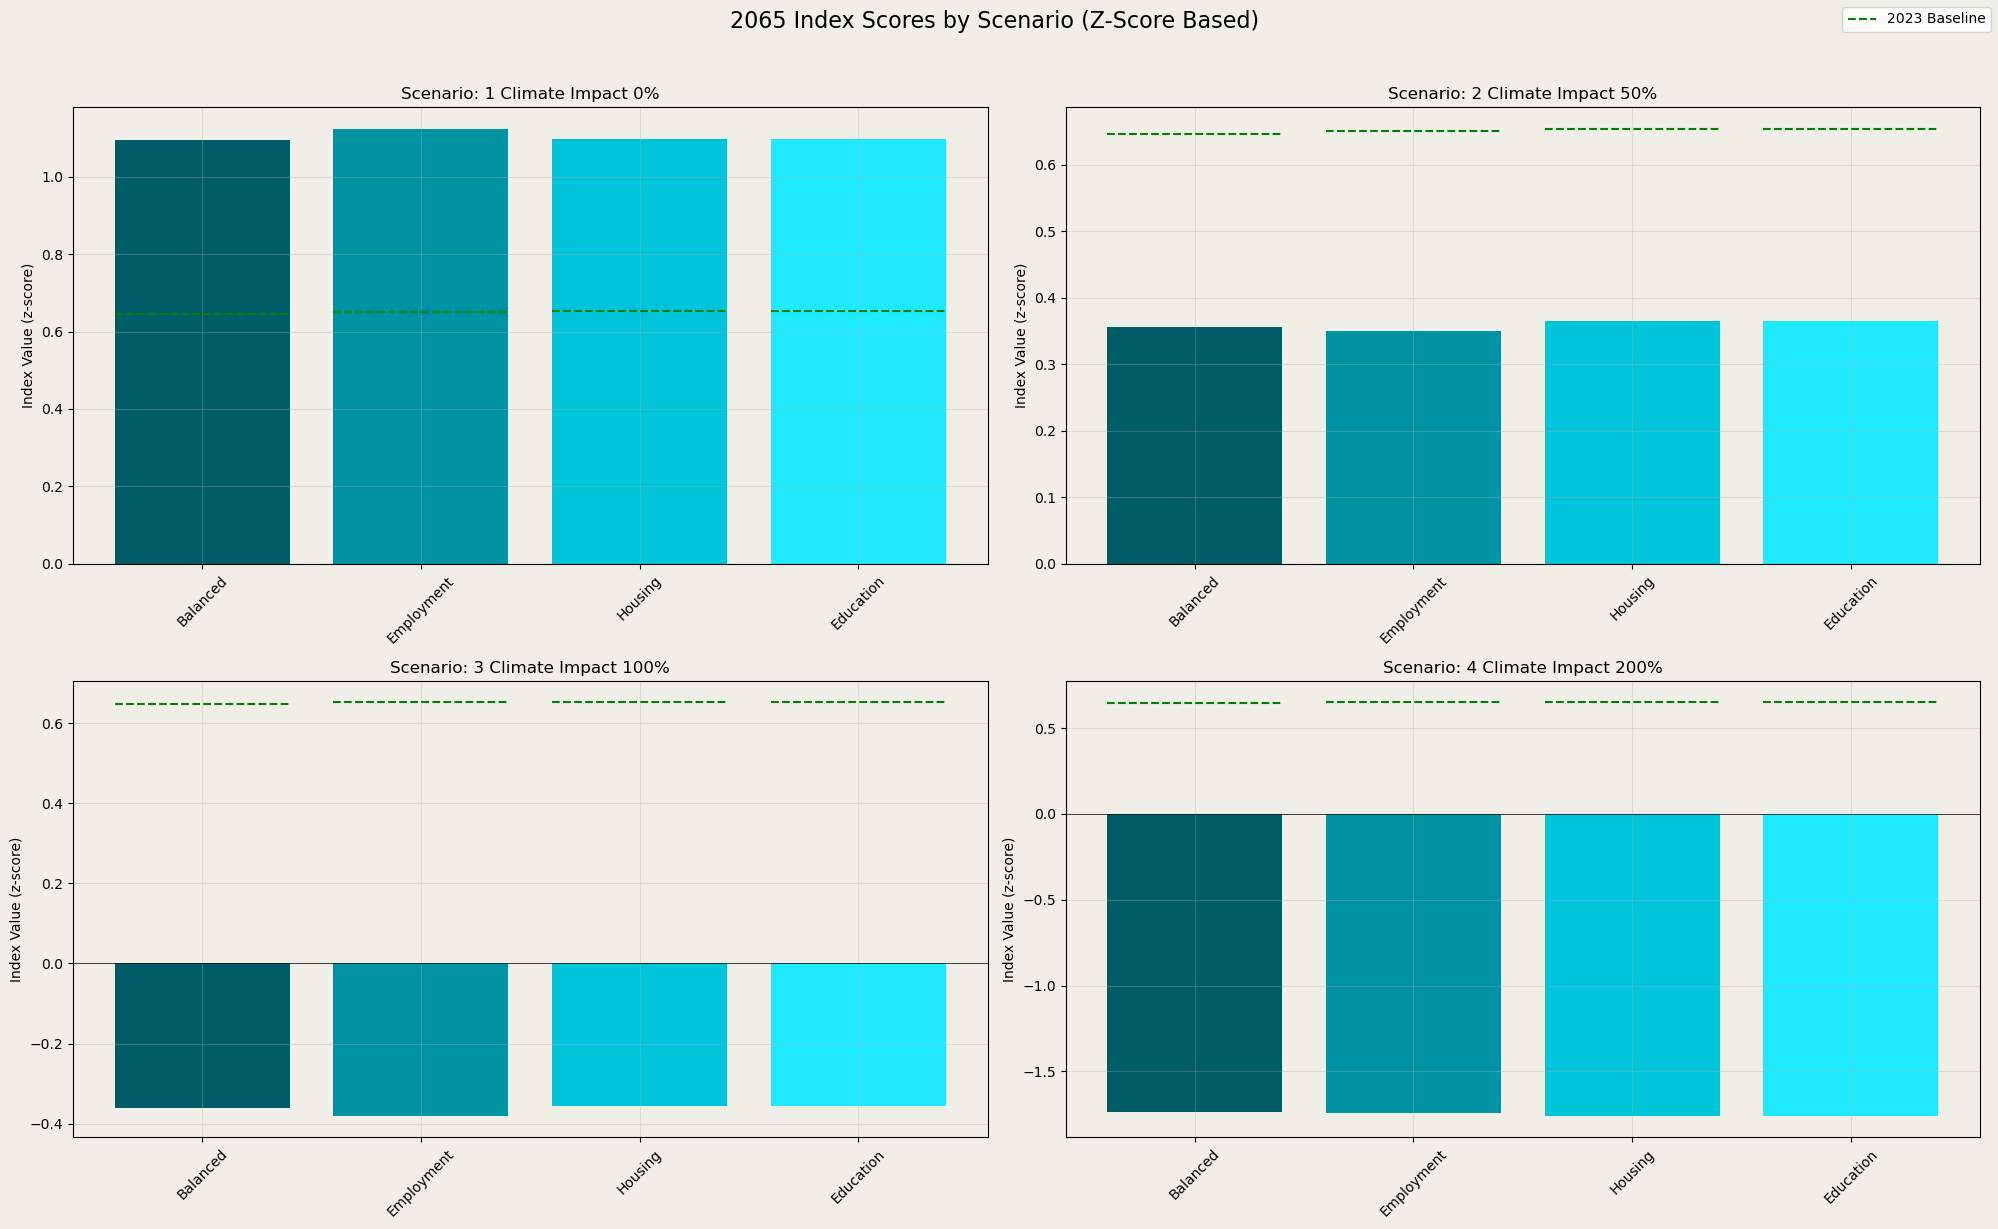

In [210]:
# Define custom colors
colors = ['#005C66', '#0093A3', '#00C4DA', '#1FE9FF']
index_cols = ["Index_Balanced", "Index_Employment", "Index_Housing", "Index_Education"]
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 12), facecolor='#efeee7')
fig.suptitle("2065 Index Scores by Scenario (Z-Score Based)", fontsize=16, y=1.02)

# Flatten axes for easier iteration
axes_flat = axes.flatten()

# Create a mapping of scenarios to subplot positions
scenarios = ["1 Climate Impact 0%", "2 Climate Impact 50%", "3 Climate Impact 100%", "4 Climate Impact 200%"]

# Plot each scenario in its own subplot
for idx, (scenario, ax) in enumerate(zip(scenarios, axes_flat)):
    # Get data for this scenario
    scenario_data = results_df.loc[scenario]
    
    # Create bar plot for each index
    x = range(len(index_cols))
    bars = ax.bar(x, [scenario_data[col] for col in index_cols], 
                 color=colors, 
                 width=0.8)
    
    # Add 2023 baseline for each index as a single line with one legend entry
    baseline_line = None
    for i, col in enumerate(index_cols):
        line = ax.plot([i-0.4, i+0.4], [df_index_2023[col].values[0]]*2, 
                color='green', linestyle='--')
        if i == 0:
            baseline_line = line[0]
    
    ax.set_facecolor('#efeee7')
    
    # Customize each subplot
    ax.set_title(f"Scenario: {scenario}", fontsize=12)
    ax.set_ylabel("Index Value (z-score)")
    ax.set_xticks(x)
    ax.set_xticklabels([col.replace("Index_", "") for col in index_cols], rotation=45)
    ax.axhline(0, color='black', linewidth=0.5)
    ax.grid(True, alpha=0.3)

# Add single legend entry for 2023 baseline
fig.legend([baseline_line], ['2023 Baseline'], loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()

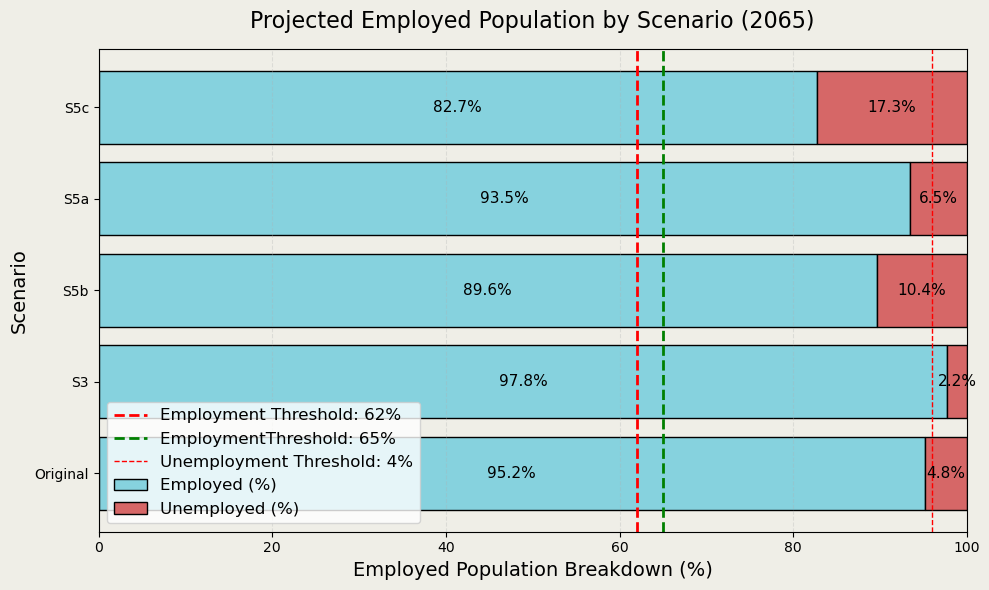

In [96]:

# Define colors
employed_color = '#86D2DE'   
unemployed_color = '#D66767' 
black_rgb = '#000000'

# Extract data
regions = erie_2065_combined["Scenario"].tolist()
employed = erie_2065_combined["TOTAL_EMPLOYED_PERCENTAGE"]
unemployed = erie_2065_combined["UNEMPLOYMENT_RATE"]

# Plot
fig, ax = plt.subplots(figsize=(10, 6), facecolor='#efeee7')

# Horizontal stacked bars
bars1 = ax.barh(regions, employed, color=employed_color, edgecolor=black_rgb, label='Employed (%)')
bars2 = ax.barh(regions, unemployed, left=employed, color=unemployed_color, edgecolor=black_rgb, label='Unemployed (%)')

# Add values to bars
for i in range(len(regions)):
    ax.text(employed[i] / 2, i, f'{employed[i]:.1f}%', va='center', ha='center', color='black', fontsize=11)
    ax.text(employed[i] + unemployed[i] / 2, i, f'{unemployed[i]:.1f}%', va='center', ha='center', color='black', fontsize=11)

# Add threshold lines
ax.axvline(62, color='red', linestyle='--', linewidth=2, label='Employment Threshold: 62%')
ax.axvline(65, color='green', linestyle='--', linewidth=2, label='EmploymentThreshold: 65%')
ax.axvline(96, color='red', linestyle='--', linewidth=1, label='Unemployment Threshold: 4%')

ax.set_facecolor('#efeee7')

# Aesthetics
ax.set_xlabel('Employed Population Breakdown (%)', fontsize=14, color=black_rgb)
ax.set_ylabel('Scenario', fontsize=14, color=black_rgb)
ax.set_title('Projected Employed Population by Scenario (2065)', fontsize=16, color=black_rgb, pad=15)
ax.set_xlim(0, 100)
ax.tick_params(axis='both', colors=black_rgb)
ax.grid(axis='x', linestyle='--', alpha=0.3)
ax.legend(loc='lower left', fontsize=12)

plt.tight_layout()
plt.show()



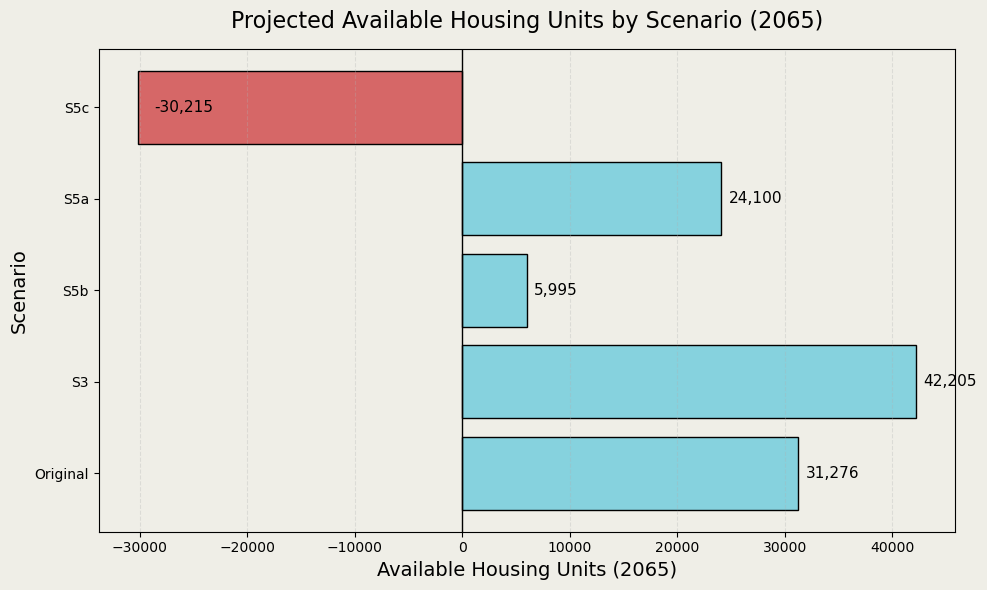

In [97]:
# Define CMYK-style hex colors
blue_rgb = '#86D2DE'   
orange_rgb = '#FFA500' 
red_rgb = '#D66767'
black_rgb = '#000000'

# Extract data
regions = erie_2065_combined["Scenario"].tolist()
erie_2065_combined_housing_units = erie_2065_combined["AVAILABLE_HOUSING_UNITS"]

# Assign colors based on sign
colors = [blue_rgb if val >= 0 else red_rgb for val in erie_2065_combined_housing_units]

# Plot
fig, ax = plt.subplots(figsize=(10, 6), facecolor='#efeee7')
bars = ax.barh(regions, erie_2065_combined_housing_units, color=colors, edgecolor=black_rgb)

# Add value labels to bars
for bar in bars:
    width = bar.get_width()
    label_x = width + 700 if width > 0 else width + 7000
    align = 'left' if width > 0 else 'right'
    ax.text(label_x, bar.get_y() + bar.get_height() / 2,
            f'{width:,.0f}', va='center', ha=align,
            color='black', fontsize=11)
    
ax.set_facecolor('#efeee7')

# Aesthetics
ax.set_xlabel('Available Housing Units (2065)', fontsize=14, color=black_rgb)
ax.set_ylabel('Scenario', fontsize=14, color=black_rgb)
ax.set_title('Projected Available Housing Units by Scenario (2065)', fontsize=16, color=black_rgb, pad=15)
ax.axvline(0, color=black_rgb, linewidth=1)
ax.tick_params(axis='both', colors=black_rgb)
ax.grid(axis='x', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


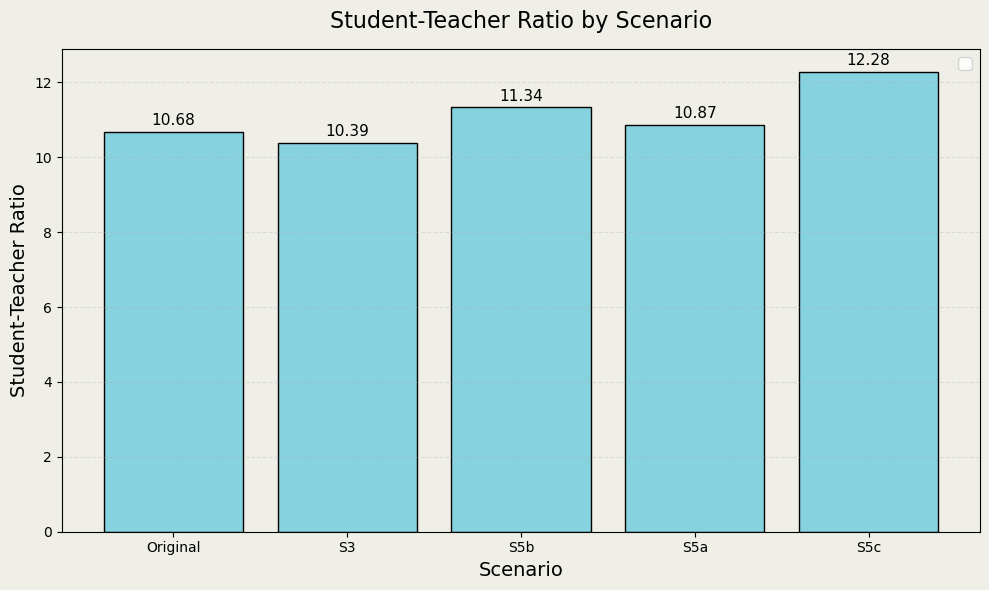

In [98]:
# Define colors
blue_rgb = '#86D2DE'   
orange_rgb = '#FFA500' 
red_rgb = '#D66767'
black_rgb = '#000000'

# Extract data
scenarios = erie_2065_combined["Scenario"].tolist()
student_teacher_ratios = erie_2065_combined["STUDENT_TEACHER_RATIO"]

# Plot
fig, ax = plt.subplots(figsize=(10, 6), facecolor='#efeee7')

# Create bar plot
bars = ax.bar(scenarios, student_teacher_ratios, color=blue_rgb, edgecolor=black_rgb)

# Add value labels to bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{height:.2f}', 
            ha='center', va='bottom', color=black_rgb, fontsize=11)

# Add threshold lines
# ax.axhline(15, color=red_rgb, linestyle='--', linewidth=2, label='High Threshold (15)')
# ax.axhline(10, color=orange_rgb, linestyle='--', linewidth=2, label='Moderate Threshold (10)')

ax.set_facecolor('#efeee7')

# Aesthetics
ax.set_title('Student-Teacher Ratio by Scenario', fontsize=16, color=black_rgb, pad=15)
ax.set_xlabel('Scenario', fontsize=14, color=black_rgb)
ax.set_ylabel('Student-Teacher Ratio', fontsize=14, color=black_rgb)
ax.tick_params(axis='both', colors=black_rgb)
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.legend(loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()

In [99]:
erie_df['HOUSE_AFFORDABILITY_PERCENT'] = erie_df['HOUSE_AFFORDABILITY'] * 100
erie_affordability_by_year_df = erie_df[['Year', 'HOUSE_AFFORDABILITY_PERCENT']]
erie_affordability_by_year_df

KeyError: 'HOUSE_AFFORDABILITY'

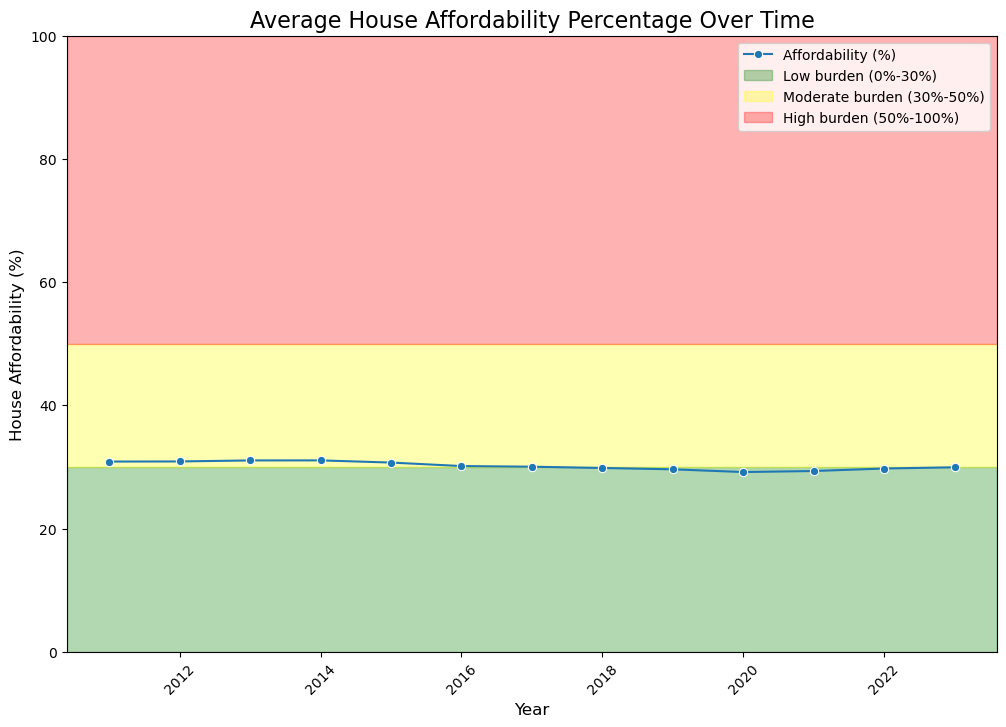

In [ ]:
# Create a time series line plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='HOUSE_AFFORDABILITY_PERCENT', data=erie_affordability_by_year_df, marker='o', label='Affordability (%)')

# Add a red dotted threshold line at 30%

plt.axhspan(0, 30, color='green', alpha=0.3, label='Low burden (0%-30%)')
plt.axhspan(30, 50, color='yellow', alpha=0.3, label='Moderate burden (30%-50%)')
plt.axhspan(50, 100, color='red', alpha=0.3, label='High burden (50%-100%)')

# Add titles and labels
plt.title('Average House Affordability Percentage Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('House Affordability (%)', fontsize=12)
plt.legend()
plt.xticks(rotation=45)

plt.ylim(0, 100)  # Set y-axis limits to 0-100%')
plt.show()


In [ ]:
erie_df["LABOR_FORCE_PERCENTAGE"] = (  erie_df["TOTAL_LABOR_FORCE"] / erie_df["POPULATION"] ) * 100
erie_labor_force_df = erie_df[['Year', 'LABOR_FORCE_PERCENTAGE']]
erie_labor_force_df

,Year,LABOR_FORCE_PERCENTAGE
12,2023,51.433092


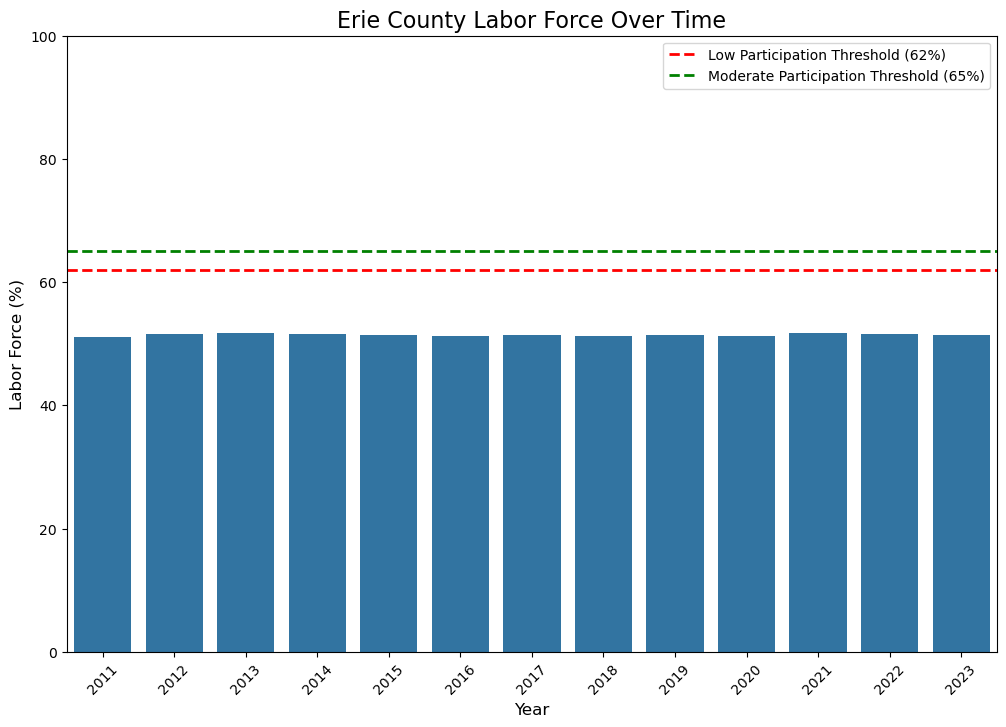

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='LABOR_FORCE_PERCENTAGE', data=erie_labor_force_df)

# Add horizontal threshold lines
plt.axhline(62, color='red', linestyle='--', linewidth=2, label='Low Participation Threshold (62%)')
plt.axhline(65, color='green', linestyle='--', linewidth=2, label='Moderate Participation Threshold (65%)')

# Add titles and labels
plt.title('Erie County Labor Force Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Labor Force (%)', fontsize=12)
plt.legend()
plt.xticks(rotation=45)

plt.ylim(0, 100)  # Set y-axis limits to 0-100%
plt.show()